# MACHINE LEARNING LAB - 3 (  EM Algorithm  )
**3. Apply EM algorithm to cluster a set of data stored in a .CSV file.**

In [1]:
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
dataset=load_iris()
# print(dataset)

In [3]:
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']
# print(X)

Text(0.5, 1.0, 'Real')

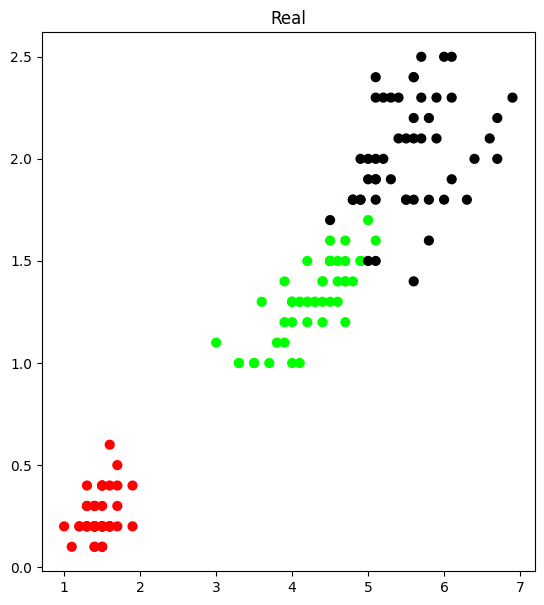

In [4]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

# REAL PLOT
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real')

The accuracy score of EM:  0.0
The Confusion matrix of EM:  [[ 0 50  0]
 [ 5  0 45]
 [50  0  0]]


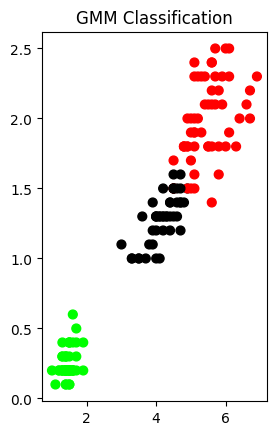

In [5]:
# GMM PLOT
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')
print('The accuracy score of EM: ',sm.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_cluster_gmm))